In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

model_id = (
    # "diffusers/examples/instruct_pix2pix/instruct-pix2pix-model"  # <- replace this
    # "diffusers/examples/instruct_pix2pix/nfs_pix2pix"
    "stablediffusionapi/juggernaut-reborn"
)
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.bfloat16
).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an e

In [3]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionInstructPix2PixPipeline,
    UNet2DConditionModel,
)

input_dir = (
    "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517/checkpoint-1000"
)
pipe.unet = UNet2DConditionModel.from_pretrained(
    input_dir,
    subfolder="unet",
    torch_dtype=torch.bfloat16,
).to("cuda")

  0%|          | 0/20 [00:00<?, ?it/s]

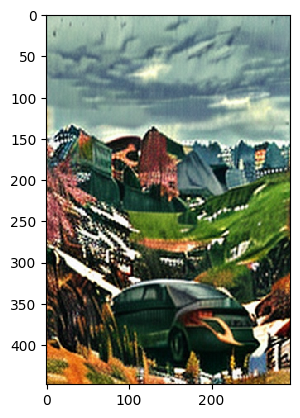

In [4]:
# url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/test_pix2pix_4.png"
url = "https://cdn.britannica.com/97/158797-004-E9F0FBE7/North-Cascades-National-Park-Lake-Ann-park.jpg"


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


image = download_image(url)


prompt = "make nfs 2005 photorealistic"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 7

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
from matplotlib import pyplot as plt

plt.imshow(edited_image, interpolation="nearest")
plt.show()

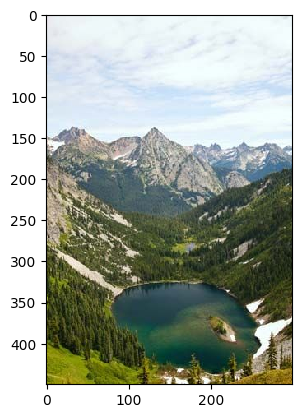

In [4]:
plt.imshow(image, interpolation="nearest")
plt.show()

### Try on nfs

  0%|          | 0/20 [00:00<?, ?it/s]

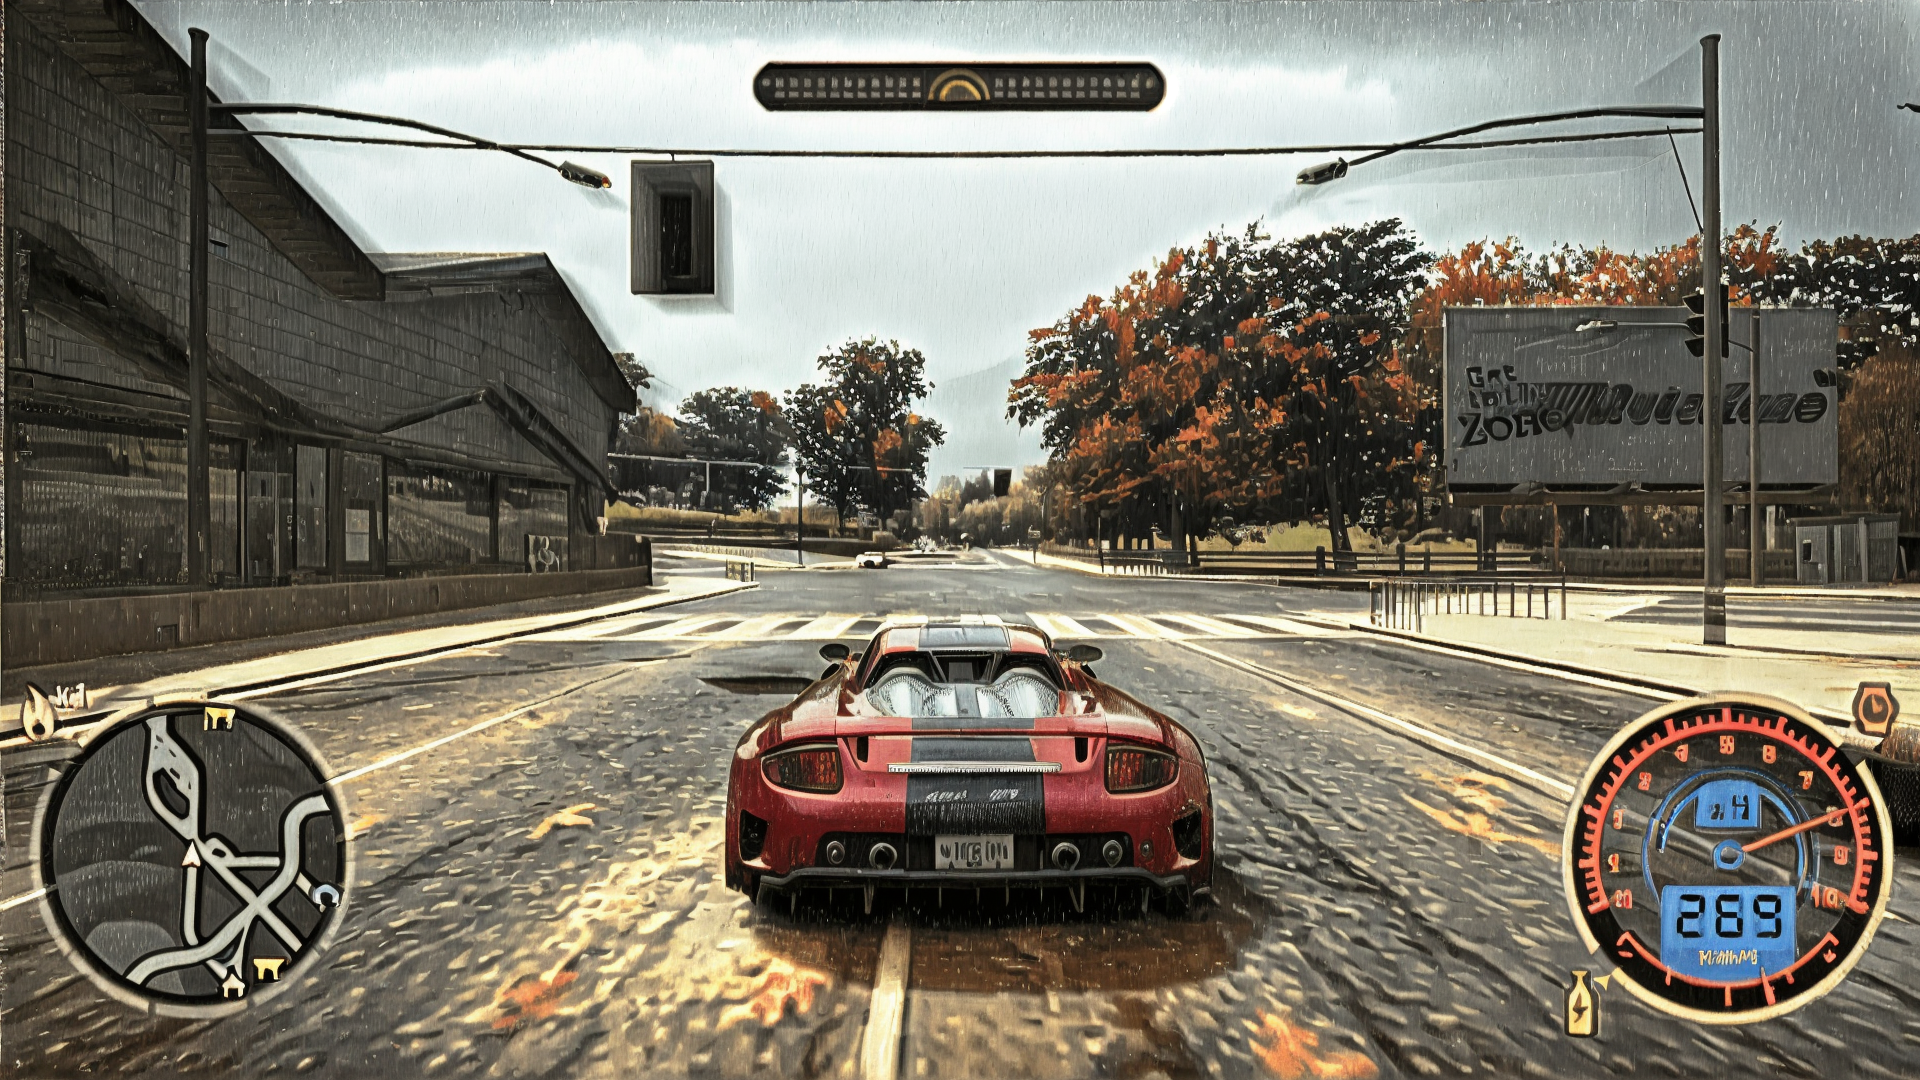

In [17]:
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000000.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000100.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000170.png"
image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000350.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000400.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000888.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000900.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000912.png"

image = PIL.Image.open(image_path).convert("RGB")

prompt = "make nfs 2005 photorealistic"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 7.0
# guidance_scale = 1.0

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

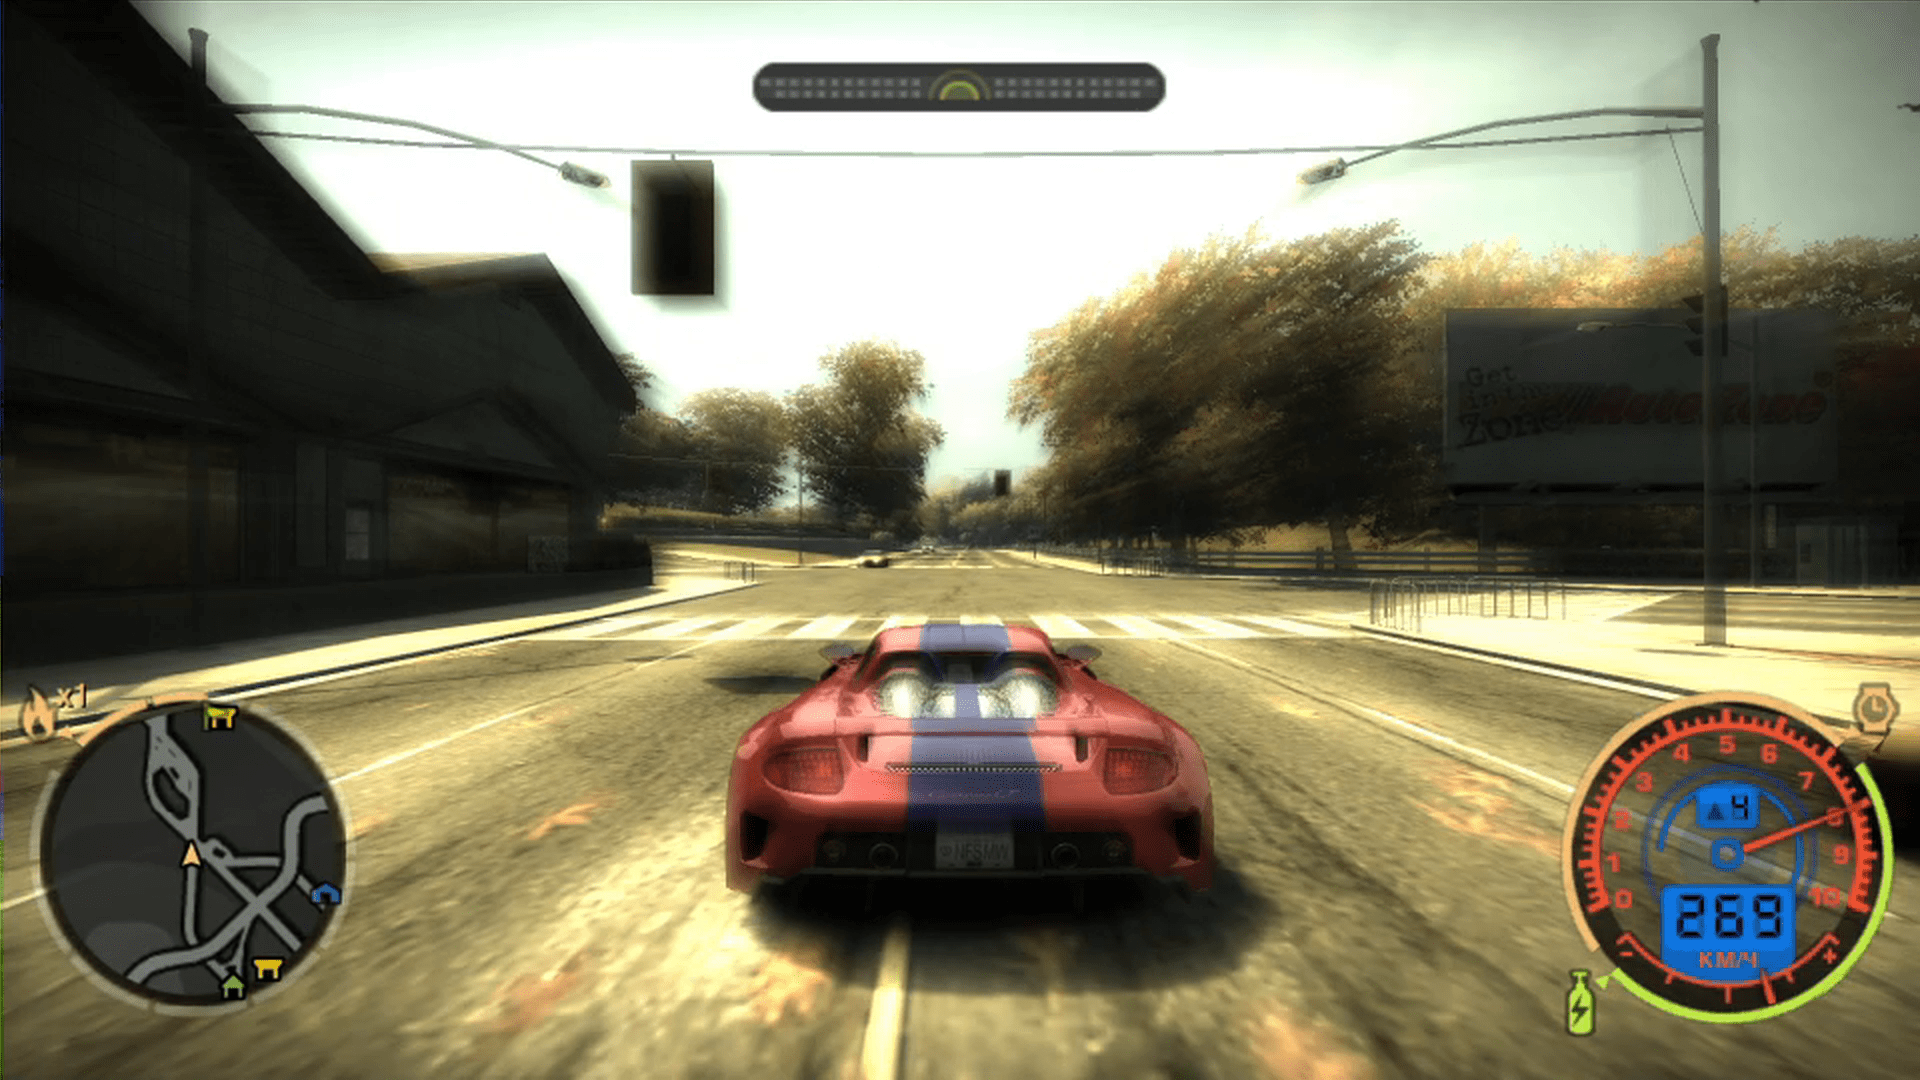

In [18]:
image